# Customer Segmentation using K- Means Clustering

## Reading data 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization


In [3]:
import os
os.chdir(r"C:\Users\Soham\Desktop\customer_ segmentation")
os.getcwd()

'C:\\Users\\Soham\\Desktop\\customer_ segmentation'

In [28]:
dataset = pd.read_csv ("Mall_Customers_data.csv")
dataset.head(11)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Total rows and column in this dataset

In [5]:
dataset.shape

(200, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are no missing values as all the columns has 200 entries properly

## Missing values computation

In [7]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Feature selection for the model

Considering only 2 features (Annual income and Spending Score) and no Label available

In [8]:
X=dataset.iloc[:,[3,4]].values

## Building the Model

KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow method
to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation

In [29]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range (1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#inertia_ is the formula used to segregate the data points into clusters


### Visualizing the ELBOW method to get the optimal value of K 

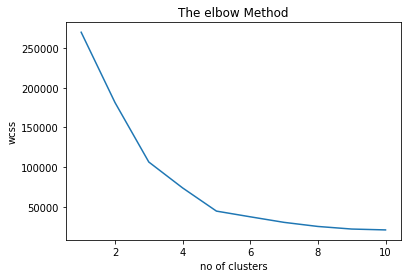

In [30]:
plt.plot(range(1,11),wcss)
plt.title('The elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

If you zoom out this curve then you will see that last elbow comes at k=5
no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
that is why we usually prefer range (1,11)
Finally we got that k=5

In [31]:
kmeansmodel = KMeans(n_clusters = 5,init='k-means++',random_state = 0)
y_kmeans = kmeansmodel.fit_predict(X)

For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

## Visualizing all the clusters 

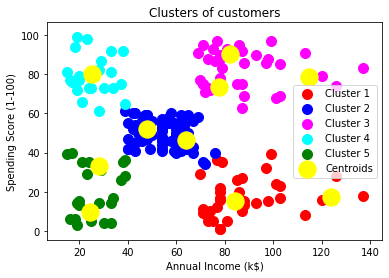

In [32]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1] ,s= 100 ,c ='red' ,label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1] ,s= 100 ,c ='blue' ,label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1] ,s= 100 ,c ='magenta' ,label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1] ,s= 100 ,c ='cyan' ,label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1] ,s= 100 ,c ='green' ,label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Model Interpretation 

Cluster 1 (Red Color) -> earning high but spending less

cluster 2 (Blue Colr) -> average in terms of earning and spending 

cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]

cluster 4 (cyan Color) -> earning less but spending more

Cluster 5 (magenta Color) -> Earning less , spending less


We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse 

wherein others we can set like once in a week or once in a month